In [1]:
# Practical Data Science with Python COSC 2670/2738 Assignment 2

# This assignment is carried into three steps

# DATA PREPARATION
# DATA EXPLORATION
# DATA MODELLING


In [2]:
# TASK 1:
# DATA PREPARATION ------

# Data preparation includes two steps : Data Retrieving and Data Cleaning

In [3]:
# DATA RETREVING---------------------------------------------

# Dataset selected  :Mice Protein Expression Data Set.

# import pacakges

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier   # Import KNN Classifier

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


In [4]:
# Load dataset

mice_dataset =pd.read_csv("Data_Cortex_Nuclear.csv",encoding='unicode_escape',error_bad_lines=False )
mice_dataset

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


In [5]:
# check data types of dataset

mice_dataset.columns

Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')

In [6]:
# check data types for each column

mice_dataset.dtypes

MouseID       object
DYRK1A_N     float64
ITSN1_N      float64
BDNF_N       float64
NR1_N        float64
              ...   
CaNA_N       float64
Genotype      object
Treatment     object
Behavior      object
class         object
Length: 82, dtype: object

In [7]:
# DATA CLEANING -----------------------

In [8]:
# check if dataset has any missing values


mice_dataset.isna().sum()

MouseID      0
DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

In [9]:
# Filling missing values 

# There are some missing values in some columns .Assuming that NAN values on some cells have been missing because no inputs has been provided at the time of mouse experiment
# So we will fill those missing cells with zero .Thus it will preserve the values of original dataset that we will be working without adding any new values in it which might impact further analysis.

mice_dataset.fillna(0 ,inplace=True )





In [10]:
# Again check if dataset has any missing values after data cleaning


mice_dataset.isna().sum()

MouseID      0
DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

In [11]:
# Finally dataset after data cleaning

mice_dataset

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


In [12]:
# TASK 2:
# DATA EXPLORATION 
#-------------------------------

# PART I : EXPLORING COLUMNS

#Explore each column (or at least 10 columns if there are more than 10 columns), using appropriate descriptive statistics and graphs (if appropriate). 

# Here we have randomly selected 10 protein and tried to find out their distribution in dataset .


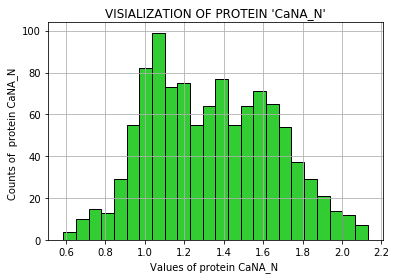

In [13]:
# Exploration 1
#---------------------------

# We will explore the counts of one type of  protein 'CaNA_N' of dataset mice_dataset

# create bins

bin1 = np.linspace(min(mice_dataset['CaNA_N'])  , max(mice_dataset['CaNA_N']) ,25)
bin1

# Plot histogram 

plt.hist(mice_dataset['CaNA_N'], bins = bin1,facecolor='limegreen', alpha=1 ,edgecolor = 'black')
plt.xlabel("Values of protein CaNA_N ")
plt.ylabel("Counts of  protein CaNA_N ")
plt.title("VISIALIZATION OF PROTEIN 'CaNA_N'")


plt.grid(True)

plt.show()

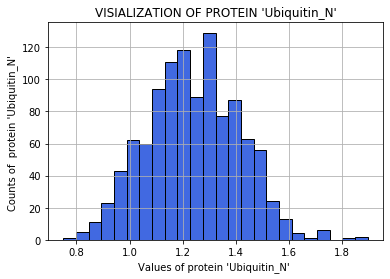

In [14]:
# Exploration 2
#---------------------------

# We will explore the counts of one type of  protein 'Ubiquitin_N' of dataset mice_dataset

# create bins

bin2 = np.linspace(min(mice_dataset['Ubiquitin_N'])  , max(mice_dataset['Ubiquitin_N']) ,25)
bin2

# Plot the histogram

plt.hist(mice_dataset['Ubiquitin_N'], bins = bin2,facecolor='royalblue', alpha=1 ,edgecolor = 'black')
plt.xlabel("Values of protein 'Ubiquitin_N' ")
plt.ylabel("Counts of  protein 'Ubiquitin_N' ")
plt.title("VISIALIZATION OF PROTEIN 'Ubiquitin_N'")

plt.grid(True)

plt.show()

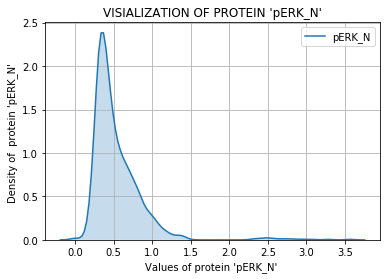

In [15]:
# Exploration 3
#------------------------------

# Explore the density distribution of levels of protein pERK_N in mice_dataset using density plot

import seaborn as sns
sns.kdeplot(data =mice_dataset['pERK_N'] ,shade=True)
plt.xlabel("Values of protein 'pERK_N' ")
plt.ylabel("Density of  protein 'pERK_N' ")
plt.title("VISIALIZATION OF PROTEIN 'pERK_N'")
plt.grid(True)




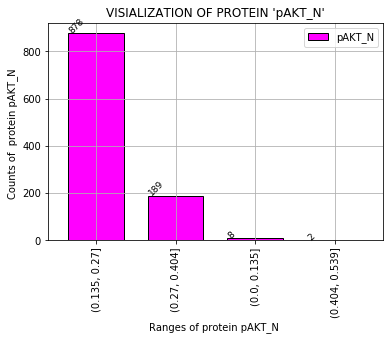

In [16]:
# Exploration 4
#---------------------------

# We will explore the counts of one type of  protein 'pAKT_N' of dataset mice_dataset

# Divide the total number of counts of protein into 5 equal parts and put them in range of their values


# Plot the graph

slice = np.linspace(min(mice_dataset['pAKT_N'])  , max(mice_dataset['pAKT_N']) ,5)

data_visualize1 = pd.cut(mice_dataset['pAKT_N'] , slice )

ax = data_visualize1.value_counts().plot(kind ="bar" ,width = 0.7 ,grid=True ,color ='magenta' ,edgecolor ='black' )
plt.xlabel("Ranges of protein pAKT_N ")
plt.ylabel("Counts of  protein pAKT_N ")
plt.title("VISIALIZATION OF PROTEIN 'pAKT_N'")
plt.legend()

# Annotate barplot 

total_list = []

for i in ax.patches:
    total_list.append(i.get_height())

for i in ax.patches:    
     
    ax.text(i.get_x()-.01, i.get_height()+.7, \
            str(round((i.get_height()),2)), fontsize=9,rotation=45)
plt.show()



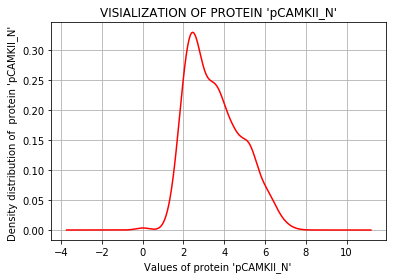

In [17]:
# Exploration 5
#-----------------------------

# Explore the density distribution of protein type pCAMKII_N in mice_dataset



mice_dataset['pCAMKII_N'].plot(kind ="density",  alpha=1 ,color ='red')
plt.xlabel("Values of protein 'pCAMKII_N' ")
plt.ylabel("Density distribution of  protein 'pCAMKII_N' ")
plt.title("VISIALIZATION OF PROTEIN 'pCAMKII_N'")

plt.grid(True)

plt.show()

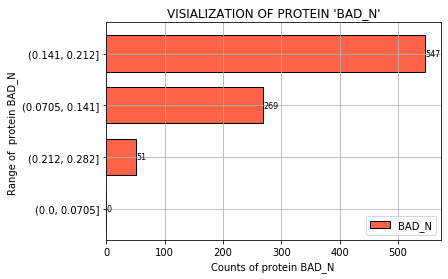

In [18]:
# Exploration 6
#----------------------------

# We will check the counts of one type of  protein 'BAD_N' of dataset mice_dataset

# Divide the total number of counts of protein into 5 equal parts and put them in range of their values


# Plot the graph

slice = np.linspace(min(mice_dataset['BAD_N'])  , max(mice_dataset['BAD_N']) ,5)

data_visualize2 = pd.cut(mice_dataset['BAD_N'] , slice )

ax =data_visualize2.value_counts().plot(kind ="barh" ,width = 0.7 ,grid=True ,color ='tomato' ,edgecolor ='black')
plt.xlabel("Counts of protein BAD_N ")
plt.ylabel("Range of  protein BAD_N ")
plt.title("VISIALIZATION OF PROTEIN 'BAD_N'")
plt.legend(loc = 'lower right')

#Annotate barplot


totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    
    ax.text(i.get_width()+.9, i.get_y()+.4, \
            str(round(i.get_width(), 2)), fontsize=8,
color='black')

ax.invert_yaxis()


plt.show()


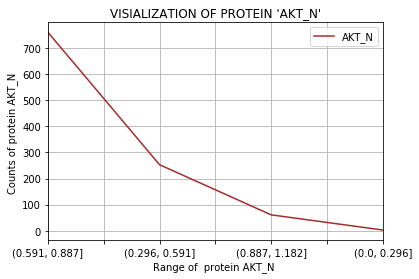

In [19]:
# Exploration 7
#---------------------------

# We will check the counts of one type of  protein 'AKT_N' of dataset mice_dataset

# Divide the total number of counts of protein into 5 equal parts and put them in range of their values


# Plot the graph

slices = np.linspace(min(mice_dataset['AKT_N'])  , max(mice_dataset['AKT_N']) ,5)

data_vis = pd.cut(mice_dataset['AKT_N'] , slices )

line1 = data_vis.value_counts().plot(kind ="line" ,grid=True ,color ='brown')
plt.ylabel("Counts of protein AKT_N ")
plt.xlabel("Range of  protein AKT_N ")
plt.title("VISIALIZATION OF PROTEIN 'AKT_N'")
plt.legend()



plt.show()


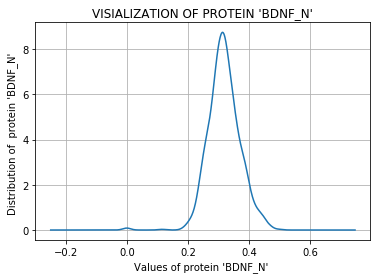

In [20]:
# Exploration 8
#---------------------------

# We will check the counts of one type of  protein 'BDNF_N' of dataset mice_dataset


# Plot the graph

mice_dataset['BDNF_N'].plot(kind ="density",  alpha=1 )
plt.xlabel("Values of protein 'BDNF_N' ")
plt.ylabel("Distribution of  protein 'BDNF_N' ")
plt.title("VISIALIZATION OF PROTEIN 'BDNF_N'")

plt.grid(True)

plt.show()

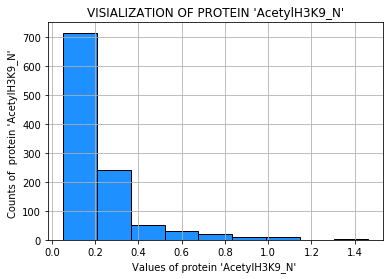

In [21]:
# Exploration 9
#---------------------------

# We will check the counts of protein level of 'AcetylH3K9_N'

# create bins

bin2 = np.linspace(min(mice_dataset['AcetylH3K9_N'])  , max(mice_dataset['AcetylH3K9_N']) ,10)
bin2

# Plot the graph

plt.hist(mice_dataset['AcetylH3K9_N'], bins = bin2,facecolor='dodgerblue', alpha=1 ,edgecolor = 'black')
plt.xlabel("Values of protein 'AcetylH3K9_N' ")
plt.ylabel("Counts of  protein 'AcetylH3K9_N' ")
plt.title("VISIALIZATION OF PROTEIN 'AcetylH3K9_N'")

plt.grid(True)

plt.show()




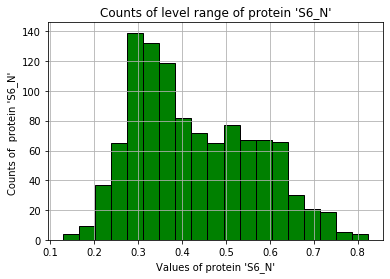

In [22]:
# Exploration 10
#---------------------------
# To find the counts of level range of protein 'S6_N' from mice_dataset


bin99 = np.linspace(min(mice_dataset['S6_N'])  , max(mice_dataset['S6_N']) ,20)

plt.hist(mice_dataset['S6_N'], bins = bin99 ,facecolor='green', alpha=1 ,edgecolor = 'black')

plt.xlabel("Values of protein 'S6_N'")
plt.ylabel("Counts of  protein 'S6_N' ")
plt.title("Counts of level range of protein 'S6_N'")
plt.grid(True)

plt.show()




In [23]:
# DATA EXPLORATION
#--------------------------------------

# PART II

# Explore the relationship between all pairs of attributes (or at least 10 pairs of attributes, if there are more in the data), and show the relationship in an appropriate graphs.
#You may choose which pairs of columns to focus on, but you need to generate a visualisation graph for each pair of attributes. 
#Each of the attribute pair should address a plausible hypothesis for the data concerned



In [24]:
# Relationship Exploration 1
#------------------------------------------------

# We will be exploring relationship between genotype and protein ITSN1_N as we want to explore based on types of Gemone what is the count of protein ITSN1 for each type


# create a copy of original dataset with required columns for this exploration 

new_dataset= mice_dataset.copy()[['Genotype','ITSN1_N']]

# Since protein ITSN1 is a large dataset so we will slice large dataset of protein level into equal slices and store it in new dataset

# Then for each geno type, we will check the counts of range of protein level.


new_dataset['Range_of_ITSN1_N']= pd.cut(new_dataset['ITSN1_N'] , 3 )


new_dataset



,Genotype,ITSN1_N,Range_of_ITSN1_N
0,Control,0.747193,"(-0.0026, 0.868]"
1,Control,0.689064,"(-0.0026, 0.868]"
2,Control,0.730247,"(-0.0026, 0.868]"
3,Control,0.617076,"(-0.0026, 0.868]"
4,Control,0.617430,"(-0.0026, 0.868]"
...,...,...,...
1075,Ts65Dn,0.463591,"(-0.0026, 0.868]"
1076,Ts65Dn,0.474163,"(-0.0026, 0.868]"
1077,Ts65Dn,0.395179,"(-0.0026, 0.868]"
1078,Ts65Dn,0.412894,"(-0.0026, 0.868]"


In [25]:
# take crosstab to get the frequencies of genotype with counts each range of protein level

crosstab2=pd.crosstab(new_dataset['Genotype'] , new_dataset['Range_of_ITSN1_N'])
crosstab2

Range_of_ITSN1_N,"(-0.0026, 0.868]","(0.868, 1.735]","(1.735, 2.603]"
Genotype,,,
Control,537,22,11
Ts65Dn,438,72,0


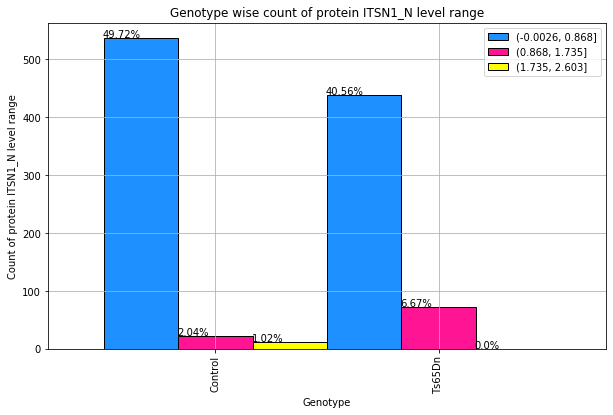

In [26]:
# plot the graph

ax= crosstab2.plot(kind='bar',width=1,grid=True ,figsize =(10,6) ,color =['dodgerblue','deeppink','yellow'] ,edgecolor ='black')

plt.ylabel("Count of protein ITSN1_N level range")
plt.title("Genotype wise count of protein ITSN1_N level range")

# Annotate barplot 

collect_list = []

for i in ax.patches:
    collect_list.append(i.get_height())

total = sum(collect_list)

for i in ax.patches:
   
    ax.text(i.get_x()-.005, i.get_height()+ 1, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=10)
               

plt.legend(loc ='best')
plt.show()

In [27]:
# Relationship Exploration 2
#-----------------------------------------

# Between Behaviour type and protein 'NR2A_N'

# slicing large dataset pf protein level into equal slices and store it in new dataset

dataset= mice_dataset.copy()[['Behavior','NR2A_N']]
dataset

# Since this protein dataset column is a large dataset so we will slice large dataset of protein level into equal slices and store it in another dataset
# Then we will explore for all ranges of this protein level with new dataset

dataset['Range_of_NR2A_N']= pd.cut(dataset['NR2A_N'] , 5 )


dataset


,Behavior,NR2A_N,Range_of_NR2A_N
0,C/S,5.990152,"(5.09, 6.786]"
1,C/S,5.685038,"(5.09, 6.786]"
2,C/S,5.622059,"(5.09, 6.786]"
3,C/S,4.979503,"(3.393, 5.09]"
4,C/S,4.718679,"(3.393, 5.09]"
...,...,...,...
1075,S/C,2.600035,"(1.697, 3.393]"
1076,S/C,2.801492,"(1.697, 3.393]"
1077,S/C,2.220852,"(1.697, 3.393]"
1078,S/C,2.384088,"(1.697, 3.393]"


In [28]:
crosstab3=pd.crosstab(dataset['Behavior'] , dataset['Range_of_NR2A_N'])
crosstab3

Range_of_NR2A_N,"(-0.00848, 1.697]","(1.697, 3.393]","(3.393, 5.09]","(5.09, 6.786]","(6.786, 8.483]"
Behavior,,,,,
C/S,0,157,302,63,3
S/C,3,212,293,47,0


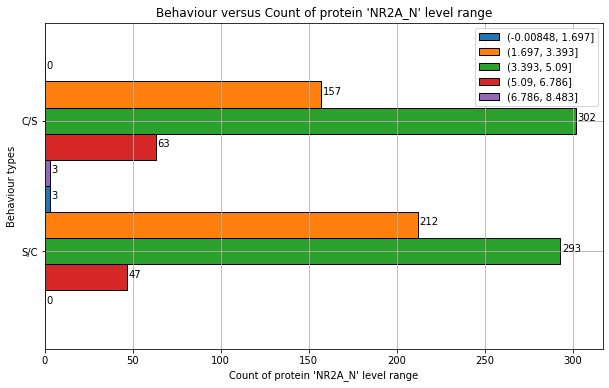

In [29]:
# plot the graph

ax= crosstab3.plot(kind='barh',width=1,grid=True ,figsize=(10,6) ,edgecolor ='black')

plt.xlabel("Count of protein 'NR2A_N' level range")

plt.ylabel("Behaviour types")

plt.title("Behaviour versus Count of protein 'NR2A_N' level range")

#Annotate barplot

totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)


for i in ax.patches:
    
    ax.text(i.get_width()+.9, i.get_y()+.1, \
            str(round(i.get_width(), 2)), fontsize=10,
color='black')

ax.invert_yaxis()

plt.legend(loc ='best')
plt.show()

In [30]:
# Relationship Exploration 3
#-----------------------------------------

# We would like to explore how one protein expressiion level related to other protein level

# For that we will first take out any 20 protein expression level randomly and will create a correlation matrix.

# Based on values of correlation we will compare two protein feature to see how they are related in experiment.

data = mice_dataset[['ITSN1_N' ,'NR2A_N' ,'DYRK1A_N' ,'SYP_N' ,'Bcatenin_N' ,'ELK_N' , 'GluR3_N' ,'GSK3B_N' ,'SOD1_N' ,'Tau_N','Treatment' ,'Genotype','class' ,'Behavior',
                    'CaNA_N' ,'Ubiquitin_N' ,'pERK_N' ,'pAKT_N' ,'pCAMKII_N' ,'BAD_N' ,'AKT_N' ,'BDNF_N' ,'AcetylH3K9_N' , 'S6_N']]

data =pd.DataFrame(data)
corrMatrix = data.corr()
print (corrMatrix)




               ITSN1_N    NR2A_N  DYRK1A_N     SYP_N  Bcatenin_N     ELK_N  \
ITSN1_N       1.000000  0.440253  0.959255  0.044856    0.425890  0.442559   
NR2A_N        0.440253  1.000000  0.335411  0.395922    0.717161  0.722191   
DYRK1A_N      0.959255  0.335411  1.000000 -0.045088    0.291131  0.298907   
SYP_N         0.044856  0.395922 -0.045088  1.000000    0.308357  0.434817   
Bcatenin_N    0.425890  0.717161  0.291131  0.308357    1.000000  0.673216   
ELK_N         0.442559  0.722191  0.298907  0.434817    0.673216  1.000000   
GluR3_N      -0.017690  0.157545 -0.019088  0.262778    0.133879  0.109421   
GSK3B_N       0.837986  0.668504  0.764707  0.208405    0.585490  0.531419   
SOD1_N       -0.306283  0.049289 -0.369810  0.150125    0.278816  0.152209   
Tau_N         0.076198 -0.090492  0.033574 -0.018533   -0.055542  0.161756   
CaNA_N        0.510772  0.178642  0.472178  0.246107    0.150195  0.202388   
Ubiquitin_N  -0.368760  0.038257 -0.427280  0.425920    0.062838

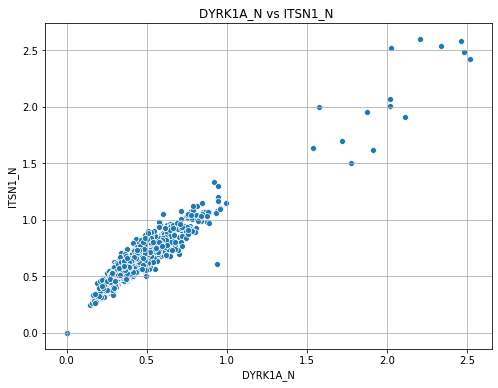

In [31]:
# plot a scattereplot  

# We can see that strong positive correlation exists between two sets of protein.

import seaborn as sns

plt.figure(figsize =(8,6))
plt.title("DYRK1A_N vs ITSN1_N ")
ax = sns.scatterplot( data=data,x='DYRK1A_N',y= 'ITSN1_N' )
plt.grid(True)
plt.show()

In [32]:
# Relationship Exploration 4
#-----------------------------------------

# For each class type we will explore the counts of protein 'SYP_N'


# create a copy of original dataset with required columns for this exploration 

dataset2= mice_dataset.copy()[['class','SYP_N']]

# Since this protein dataset column is a large dataset so we will slice large dataset of protein level into equal slices and store it in another dataset
# Then we will check for all ranges of this protein level with new dataset


dataset2['Range_of_SYP_N']= pd.cut(dataset2['SYP_N'] , 4 )


dataset2




,class,SYP_N,Range_of_SYP_N
0,c-CS-m,0.427099,"(0.384, 0.509]"
1,c-CS-m,0.441581,"(0.384, 0.509]"
2,c-CS-m,0.435777,"(0.384, 0.509]"
3,c-CS-m,0.391691,"(0.384, 0.509]"
4,c-CS-m,0.434154,"(0.384, 0.509]"
...,...,...,...
1075,t-SC-s,0.374088,"(0.258, 0.384]"
1076,t-SC-s,0.375259,"(0.258, 0.384]"
1077,t-SC-s,0.422121,"(0.384, 0.509]"
1078,t-SC-s,0.397676,"(0.384, 0.509]"


In [33]:


group2 = pd.crosstab(dataset2['class'] , dataset2['Range_of_SYP_N'])
group2

Range_of_SYP_N,"(0.258, 0.384]","(0.384, 0.509]","(0.509, 0.634]","(0.634, 0.76]"
class,,,,
c-CS-m,11,106,33,0
c-CS-s,26,87,19,3
c-SC-m,18,110,22,0
c-SC-s,13,78,44,0
t-CS-m,44,80,11,0
t-CS-s,33,48,24,0
t-SC-m,17,106,12,0
t-SC-s,28,96,10,1


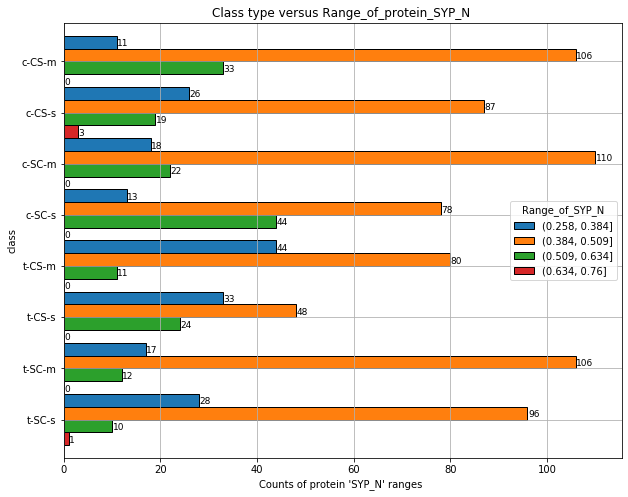

In [34]:
# plot the graph

ax = group2.plot(kind="barh" , width =1 , grid=True ,figsize =(10,8) ,edgecolor ='black')
plt.title("Class type versus Range_of_protein_SYP_N ")
plt.xlabel("Counts of protein 'SYP_N' ranges ")

#Annotation

totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    
    ax.text(i.get_width()+.1, i.get_y()+.2, \
            str(round(i.get_width(), 2)), fontsize=9,color='black')

ax.invert_yaxis()
plt.show()

In [35]:
# Relationship Exploration 5
#------------------------------------

# Based on Genotypes we will explore the counts of protein level Bcatenin_N


# create a copy of original dataset with required columns for this exploration 

dataset3= mice_dataset.copy()[['Genotype','Bcatenin_N']]

# Since this protein dataset column is a large dataset so we will slice large dataset of protein level into equal slices and store it in another dataset
# Then we will check for all ranges of this protein level with new dataset


dataset3['Range_of_Bcatenin_N']= pd.cut(dataset3['Bcatenin_N'] , 4 )


dataset3


,Genotype,Bcatenin_N,Range_of_Bcatenin_N
0,Control,3.037621,"(2.76, 3.681]"
1,Control,2.921882,"(2.76, 3.681]"
2,Control,2.944136,"(2.76, 3.681]"
3,Control,2.500204,"(1.84, 2.76]"
4,Control,2.456560,"(1.84, 2.76]"
...,...,...,...
1075,Ts65Dn,1.828208,"(0.92, 1.84]"
1076,Ts65Dn,1.883370,"(1.84, 2.76]"
1077,Ts65Dn,1.494208,"(0.92, 1.84]"
1078,Ts65Dn,1.571820,"(0.92, 1.84]"


In [36]:
group_pro1 = pd.crosstab(dataset3['Genotype'] , dataset3['Range_of_Bcatenin_N'] )
group_pro1

Range_of_Bcatenin_N,"(-0.00368, 0.92]","(0.92, 1.84]","(1.84, 2.76]","(2.76, 3.681]"
Genotype,,,,
Control,15,153,357,45
Ts65Dn,3,126,332,49


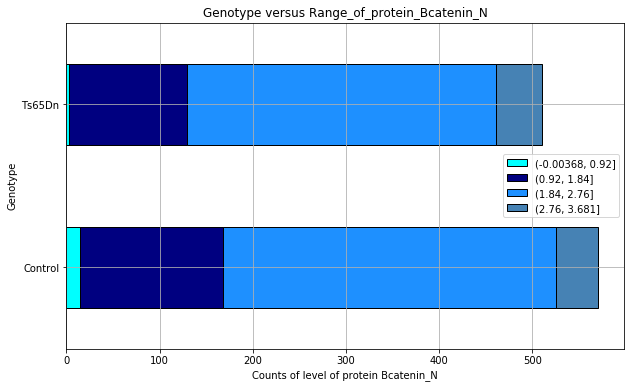

In [37]:
# plot the graph

group_pro1.plot(kind="barh",  figsize = (10,6), grid=  True ,stacked =True ,edgecolor ='black' ,color= ['cyan','navy','dodgerblue','steelblue'])


plt.legend(loc ='best' )
plt.title("Genotype versus Range_of_protein_Bcatenin_N")
plt.xlabel("Counts of level of protein Bcatenin_N")
plt.show()


In [38]:
# Relationship Exploration 6
#------------------------------------

# Based on Treatment type we will explore the counts of protein type ELK_N   

  
# create a copy of original dataset with required columns for this exploration

newdata =  mice_dataset.copy()[['Treatment','ELK_N']]

# Since this protein dataset column is a large dataset so we will slice large dataset of protein level into equal slices and store it in another dataset
# Then we will check for all ranges of this protein level with new dataset

newdata['Range_of_ELK_N']= pd.cut(newdata['ELK_N'] , 3 )

newdata


,Treatment,ELK_N,Range_of_ELK_N
0,Memantine,1.866358,"(0.934, 1.869]"
1,Memantine,1.761047,"(0.934, 1.869]"
2,Memantine,1.765544,"(0.934, 1.869]"
3,Memantine,1.286277,"(0.934, 1.869]"
4,Memantine,1.324695,"(0.934, 1.869]"
...,...,...,...
1075,Saline,0.896430,"(-0.0028, 0.934]"
1076,Saline,0.958879,"(0.934, 1.869]"
1077,Saline,0.762892,"(-0.0028, 0.934]"
1078,Saline,0.781893,"(-0.0028, 0.934]"


In [39]:

group1 = pd.crosstab(newdata['Treatment'],newdata['Range_of_ELK_N'])
group1

Range_of_ELK_N,"(-0.0028, 0.934]","(0.934, 1.869]","(1.869, 2.803]"
Treatment,,,
Memantine,155,401,14
Saline,110,371,29


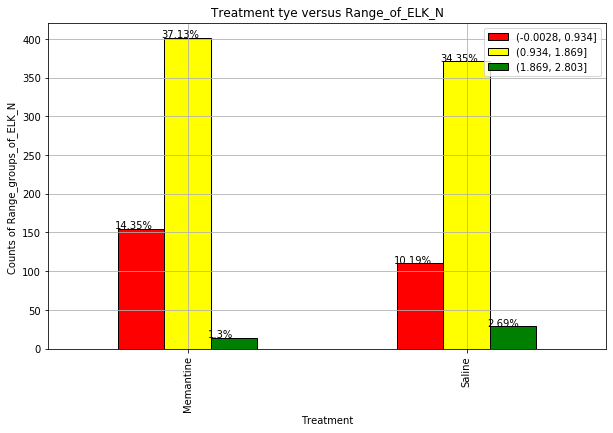

In [40]:
# plot graph
ax =group1.plot(kind='bar' ,figsize = (10,6) ,color =['red','yellow','green'],grid =True ,edgecolor ='black')

# Annotate barplot 

collect_list = []

for i in ax.patches:
    collect_list.append(i.get_height())

total = sum(collect_list)

for i in ax.patches:
   
    ax.text(i.get_x()-.01, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=10 )

plt.title("Treatment tye versus Range_of_ELK_N")
plt.ylabel("Counts of Range_groups_of_ELK_N ")
plt.legend(loc= 'upper right')
plt.show()        

In [41]:
# Relationship Exploration 7
#------------------------------------

#  In this exploration ,for each class type, we will check the level of protein type GluR3_N


# create a copy of original dataset with required columns for this exploration 

newdata44 =  mice_dataset.copy()[['class','GluR3_N']]

# Since this protein dataset column is a large dataset so we will slice large dataset of protein level into equal slices and store it in another dataset
# Then we will check for all ranges of this protein level with new dataset

newdata44['Range_of_GluR3_N']= pd.cut(newdata44['GluR3_N'] , 4 )


newdata44


,class,GluR3_N,Range_of_GluR3_N
0,c-CS-m,0.228043,"(0.221, 0.276]"
1,c-CS-m,0.238073,"(0.221, 0.276]"
2,c-CS-m,0.244817,"(0.221, 0.276]"
3,c-CS-m,0.234947,"(0.221, 0.276]"
4,c-CS-m,0.255528,"(0.221, 0.276]"
...,...,...,...
1075,t-SC-s,0.207748,"(0.166, 0.221]"
1076,t-SC-s,0.205114,"(0.166, 0.221]"
1077,t-SC-s,0.201088,"(0.166, 0.221]"
1078,t-SC-s,0.204467,"(0.166, 0.221]"


In [42]:
cross1 = pd.crosstab(newdata44['class']  ,newdata44['Range_of_GluR3_N'])
cross1

Range_of_GluR3_N,"(0.111, 0.166]","(0.166, 0.221]","(0.221, 0.276]","(0.276, 0.331]"
class,,,,
c-CS-m,5,56,70,19
c-CS-s,4,52,56,23
c-SC-m,0,72,58,20
c-SC-s,0,63,57,15
t-CS-m,1,60,71,3
t-CS-s,14,69,22,0
t-SC-m,0,93,37,5
t-SC-s,5,87,43,0


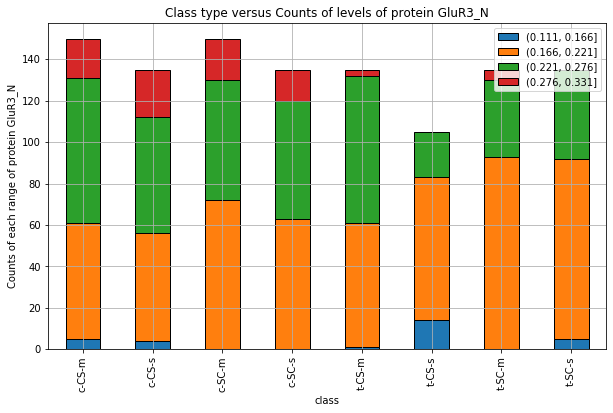

In [43]:
#plot the graph

cross1.plot(kind ='bar', stacked = True, grid = True,figsize=(10,6) ,edgecolor ='black' )
plt.ylabel("Counts of each range of protein GluR3_N")
plt.title("Class type versus Counts of levels of protein GluR3_N")
plt.legend(loc='upper right')
plt.show()

In [44]:
# Relationship Exploration 8
#------------------------------------

# Based on each Treatment type  we wil check the level of protein  GSK3B_N


# create a copy of original dataset with required columns for this exploration 

newdata55 =  mice_dataset.copy()[['Treatment','GSK3B_N']]

# Since this protein dataset column is a large dataset so we will slice large dataset of protein level into equal slices and store it in another dataset
# Then we will check for all ranges of this protein level with new dataset


newdata55['Range_of_GSK3B_N']= pd.cut(newdata55['GSK3B_N'] , 4 )


newdata55




,Treatment,GSK3B_N,Range_of_GSK3B_N
0,Memantine,1.537227,"(1.238, 1.857]"
1,Memantine,1.509249,"(1.238, 1.857]"
2,Memantine,1.501244,"(1.238, 1.857]"
3,Memantine,1.419710,"(1.238, 1.857]"
4,Memantine,1.359876,"(1.238, 1.857]"
...,...,...,...
1075,Saline,0.993107,"(0.619, 1.238]"
1076,Saline,0.974891,"(0.619, 1.238]"
1077,Saline,0.818199,"(0.619, 1.238]"
1078,Saline,0.872820,"(0.619, 1.238]"


In [45]:
grp = pd.crosstab(newdata55['Range_of_GSK3B_N'] ,newdata55['Treatment'])
grp

Treatment,Memantine,Saline
Range_of_GSK3B_N,,
"(-0.00248, 0.619]",1,8
"(0.619, 1.238]",344,330
"(1.238, 1.857]",224,157
"(1.857, 2.476]",1,15


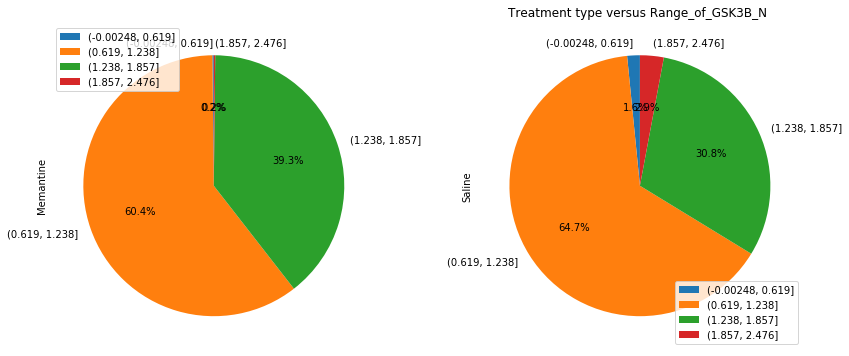

In [46]:

grp.plot(kind='pie',figsize=(14,6),subplots =True,autopct ='%0.1f%%',startangle =90)
plt.legend(loc= 'lower right')
plt.title("Treatment type versus Range_of_GSK3B_N " )
plt.show()

In [47]:
# Relationship Exploration 9
#------------------------------------

# We would like to explore the counts of protein SOD1_N for each types of classes of mice

# create a copy of original dataset with required columns for this exploration 

newdata66 =  mice_dataset.copy()[['class', 'SOD1_N']]

# Since this protein dataset column is a large dataset so we will slice large dataset of protein level into equal slices and store it in another dataset
# Then we will check for all ranges of this protein level with new dataset


newdata66['Range_of_SOD1_N']= pd.cut(newdata66['SOD1_N'] , 3 )

newdata66



,class,SOD1_N,Range_of_SOD1_N
0,c-CS-m,0.369510,"(-0.00187, 0.624]"
1,c-CS-m,0.342279,"(-0.00187, 0.624]"
2,c-CS-m,0.343696,"(-0.00187, 0.624]"
3,c-CS-m,0.344509,"(-0.00187, 0.624]"
4,c-CS-m,0.329126,"(-0.00187, 0.624]"
...,...,...,...
1075,t-SC-s,0.820078,"(0.624, 1.249]"
1076,t-SC-s,0.854258,"(0.624, 1.249]"
1077,t-SC-s,0.661809,"(0.624, 1.249]"
1078,t-SC-s,0.698413,"(0.624, 1.249]"


In [48]:
grp1 = pd.crosstab(newdata66['class'] ,newdata66['Range_of_SOD1_N'] )
grp1

Range_of_SOD1_N,"(-0.00187, 0.624]","(0.624, 1.249]","(1.249, 1.873]"
class,,,
c-CS-m,150,0,0
c-CS-s,135,0,0
c-SC-m,75,75,0
c-SC-s,26,100,9
t-CS-m,135,0,0
t-CS-s,105,0,0
t-SC-m,38,83,14
t-SC-s,65,62,8


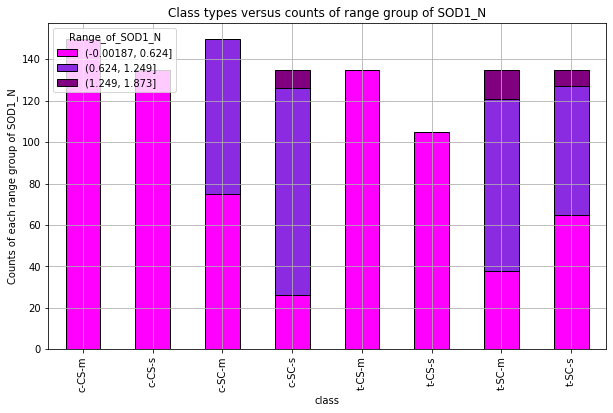

In [49]:
# plot graph

grp1.plot(kind='bar', figsize=(10,6) ,stacked=True ,color =['magenta','blueviolet','purple'],grid=True ,edgecolor ='black')
plt.ylabel("Counts of each range group of SOD1_N")
plt.title("Class types versus counts of range group of SOD1_N")

plt.show()

In [50]:
# Relationship Exploration 10
#------------------------------------

# In this exploration we will check the level of protein type Tau_N for eaxh treatment type


# create a copy of original dataset with required columns for this exploration 

baxdata =  mice_dataset.copy()[['Treatment', 'Tau_N']]

baxdata 


,Treatment,Tau_N
0,Memantine,0.125190
1,Memantine,0.134275
2,Memantine,0.132560
3,Memantine,0.123210
4,Memantine,0.136838
...,...,...
1075,Saline,0.411286
1076,Saline,0.402073
1077,Saline,0.395648
1078,Saline,0.414200


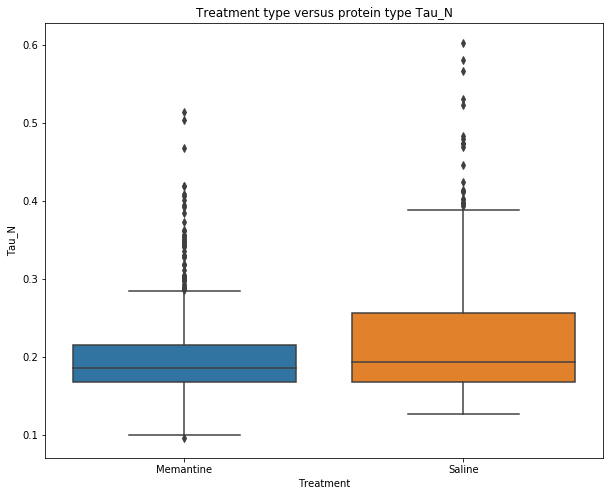

In [51]:
# plot a boxplot

import seaborn as sns

plt.figure(figsize=(10,8))
plt.title("Treatment type versus protein type Tau_N")
ax = sns.boxplot( data=baxdata,x='Treatment',y= 'Tau_N' )



In [52]:
###################### DATA MODELLING ################################

# Data modelling is mainly based on 4 steps 
#a) Feature engineering and model selection  
#b) Training the model 
# c) Model validation and selection 
# d) Applying the trained model to unseen data 

In [53]:
###################### DATA MODELLING ################################


# We will proceed with classification as we already have class label for different types of mices and through classification, we can check which subsets of protein determines class types

# First we will perform data modelling using KKN algorithm

# Second we ill perform data modelling using Decision tree algorithm

# Compare the result of both modelling process 



In [54]:
# 1. DATA MODELLING : KNN ALGORITHM ---------------

In [55]:
# We will carry out the below steps for performing KNN algorithm 

# 1. First we will select all 77 features and  apply KNN classifier will check the scores of model

# 2.Then with the help of Hill climbing search , we will select the best feature that will give us the best score of model.

# 3. Again we will perform the KNN algorithm on model with these feature to get model score and finally will compare with previous model(with all features together)

# In this 3rd step we will also perform parameter tuning such changing p value,k values



In [56]:
# Step 1 :we will select all 77 features and  apply KNN classifier will check the scores of model

#  set features and target dataset

knn_feature = mice_dataset.iloc[:,1:78]
knn_target = mice_dataset.iloc[:,-1]
print(knn_feature)
print(knn_target)



      DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0     0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1     0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2     0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3     0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4     0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   
...        ...       ...       ...       ...       ...       ...       ...   
1075  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736  0.171262   
1076  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274  0.182496   
1077  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665  0.161435   
1078  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897  0.173623   
1079  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001  0.191811   

      pCAMKII_N   pCREB_N    pELK_N  ...     SHH_N     BAD_N  B

In [57]:

# Split it into traning dataset and test into 75% traning  is to 25%  test data

x_train , x_test , y_train , y_test = train_test_split(knn_feature ,knn_target ,random_state=0, test_size=0.25)


In [58]:
# Define model

classifier = KNeighborsClassifier(n_neighbors=5 ,p=2)
classifier


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [59]:
# Fit model and train 

classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [60]:
#Predict Output

y_predict = classifier.predict(x_test)
y_predict

array(['t-CS-s', 't-CS-s', 't-CS-m', 'c-SC-s', 'c-CS-m', 't-SC-s',
       't-SC-s', 'c-SC-m', 'c-SC-s', 'c-SC-s', 't-CS-s', 't-CS-m',
       'c-SC-s', 't-SC-s', 't-CS-m', 'c-SC-s', 'c-CS-s', 'c-SC-s',
       'c-SC-s', 'c-SC-s', 't-CS-s', 'c-SC-m', 'c-SC-m', 't-SC-m',
       'c-CS-m', 'c-CS-m', 'c-SC-s', 'c-CS-s', 't-SC-m', 't-CS-s',
       'c-SC-m', 't-SC-s', 'c-SC-m', 't-CS-m', 't-CS-s', 't-CS-m',
       'c-CS-m', 'c-CS-m', 't-SC-m', 'c-SC-s', 'c-CS-m', 'c-CS-s',
       'c-CS-m', 't-SC-m', 'c-SC-m', 't-CS-s', 't-CS-m', 't-SC-m',
       't-CS-m', 't-SC-m', 't-CS-m', 'c-CS-m', 'c-SC-s', 'c-SC-s',
       'c-CS-m', 'c-CS-m', 'c-CS-m', 'c-CS-m', 'c-SC-s', 'c-SC-s',
       'c-SC-m', 'c-SC-m', 'c-CS-s', 'c-SC-s', 't-SC-m', 't-CS-s',
       'c-SC-m', 'c-CS-s', 'c-CS-s', 't-SC-s', 't-SC-s', 'c-CS-m',
       'c-CS-m', 't-CS-s', 'c-CS-m', 'c-CS-s', 'c-SC-m', 'c-CS-m',
       't-SC-m', 'c-SC-s', 't-SC-s', 't-SC-m', 't-SC-s', 'c-CS-m',
       't-CS-m', 't-SC-s', 't-SC-s', 't-CS-s', 'c-CS-s', 'c-SC

In [61]:
# Frequency of y_predict

unique_elements, counts_elements = np.unique(y_predict, return_counts=True)
print("Frequency of  each elements predicted in y_predict:")
print(np.asarray((unique_elements, counts_elements)))



Frequency of  each elements predicted in y_predict:
[['c-CS-m' 'c-CS-s' 'c-SC-m' 'c-SC-s' 't-CS-m' 't-CS-s' 't-SC-m' 't-SC-s']
 [39 31 35 41 33 30 28 33]]


In [62]:
# Evaluate model

confuse = confusion_matrix(y_test, y_predict)
confuse

array([[29,  0,  0,  0,  0,  0,  0,  0],
       [ 3, 28,  0,  0,  0,  1,  0,  0],
       [ 0,  0, 31,  1,  0,  0,  1,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  0],
       [ 4,  2,  0,  0, 33,  1,  0,  1],
       [ 2,  1,  0,  0,  0, 28,  0,  0],
       [ 0,  0,  3,  0,  0,  0, 27,  0],
       [ 1,  0,  1,  0,  0,  0,  0, 32]], dtype=int64)

In [63]:
# get the accuracy score

print(accuracy_score(y_test, y_predict))

0.9185185185185185


In [64]:
# check the classification report for details 

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

      c-CS-m       0.74      1.00      0.85        29
      c-CS-s       0.90      0.88      0.89        32
      c-SC-m       0.89      0.94      0.91        33
      c-SC-s       0.98      1.00      0.99        40
      t-CS-m       1.00      0.80      0.89        41
      t-CS-s       0.93      0.90      0.92        31
      t-SC-m       0.96      0.90      0.93        30
      t-SC-s       0.97      0.94      0.96        34

    accuracy                           0.92       270
   macro avg       0.92      0.92      0.92       270
weighted avg       0.93      0.92      0.92       270



In [65]:
#MODEL VALIDATION USING KFOLD CROSS METHOD IN KNN ALGORITHM

# We will validate model with dataset having all features

from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=4, shuffle=True)

 

#run the KFlod cross validation
for k, (train_index, test_index) in enumerate(kf.split(knn_feature)):
 
    x_train, x_test = knn_feature.iloc[train_index], knn_feature.iloc[test_index]
    y_train, y_test = knn_target.iloc[train_index], knn_target.iloc[test_index]
     
    classifier.fit(x_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, classifier.score(x_test, y_test)))


[fold 0] score: 0.88426
[fold 1] score: 0.96759
[fold 2] score: 0.91204
[fold 3] score: 0.96759
[fold 4] score: 0.93056


In [66]:
# From the above K-Fold cross validation test, we could see that the best score obtained by one of the fold is 0.96 or about 96% accuracy which is very good.

#Now we will perform Hill Climbing to select best feature and will all all 4 process of modelling with only best features.


In [67]:
# 2.Then with the help of Hill climbing search , we will select the best feature that will give us the best score of model.

# We will loop through all the features and will select the best feature/features with highest score


In [68]:
# Select best features 

from sklearn.utils import shuffle
new_Ind =[]
cur_MaxScore =0.0
col_num =76
col_Ind_Random = shuffle(range(0,col_num), random_state = 1)

for i in range(0,col_num):
    new_Ind.append(col_Ind_Random[i]) 
    newData = knn_feature.iloc[:, new_Ind]
    x_train, x_test, y_train, y_test = train_test_split(newData,  knn_target, test_size= 0.25, random_state=0)
    clf = KNeighborsClassifier(5, weights='distance', p=1) 
    fit = clf.fit(x_train, y_train)  
    cur_Score = clf.score(x_test, y_test) 
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[i])
    else:
        cur_MaxScore = cur_Score 
        print("Score with " + str(len(new_Ind)) + " selected  features: " + str(cur_Score)) 
         
print("There are " + str(len(new_Ind)) + " features selected:")  
print(sorted(new_Ind))                            
                     
                                                             
                        

Score with 1 selected  features: 0.1925925925925926
Score with 2 selected  features: 0.34074074074074073
Score with 3 selected  features: 0.6592592592592592
Score with 4 selected  features: 0.725925925925926
Score with 5 selected  features: 0.7592592592592593
Score with 6 selected  features: 0.8074074074074075
Score with 7 selected  features: 0.8148148148148148
Score with 8 selected  features: 0.8333333333333334
Score with 9 selected  features: 0.8962962962962963
Score with 10 selected  features: 0.9185185185185185
Score with 11 selected  features: 0.9222222222222223
Score with 12 selected  features: 0.9333333333333333
Score with 13 selected  features: 0.937037037037037
Score with 14 selected  features: 0.9481481481481482
Score with 15 selected  features: 0.9555555555555556
Score with 16 selected  features: 0.9629629629629629
Score with 17 selected  features: 0.9703703703703703
Score with 18 selected  features: 0.9703703703703703
Score with 19 selected  features: 0.9740740740740741
Sco

In [69]:
# show the names of columns of best feature given by Hill climbing search which gave highest accuracy

best= [0, 2, 5, 6, 10, 11, 12, 13, 15, 18, 19, 22, 26, 29, 30, 32, 33, 34, 36, 37, 39, 40, 42, 43, 45, 46, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 61, 63, 64, 66, 67, 68, 70, 71, 72, 73, 74, 75]
for i in range(len(best)):
    print("Name of columns of best feature given by above search " + knn_feature.columns[i])
    

Name of columns of best feature given by above search DYRK1A_N
Name of columns of best feature given by above search ITSN1_N
Name of columns of best feature given by above search BDNF_N
Name of columns of best feature given by above search NR1_N
Name of columns of best feature given by above search NR2A_N
Name of columns of best feature given by above search pAKT_N
Name of columns of best feature given by above search pBRAF_N
Name of columns of best feature given by above search pCAMKII_N
Name of columns of best feature given by above search pCREB_N
Name of columns of best feature given by above search pELK_N
Name of columns of best feature given by above search pERK_N
Name of columns of best feature given by above search pJNK_N
Name of columns of best feature given by above search PKCA_N
Name of columns of best feature given by above search pMEK_N
Name of columns of best feature given by above search pNR1_N
Name of columns of best feature given by above search pNR2A_N
Name of columns 

In [70]:
# 3. Now again we will perform the KNN algorithm on model with these above feature to get model score and finally will compare with previous model(with all features together)
 
# In this 3rd step we will also perform PARAMETER TUNING such changing p value,k values and see the changes after modelling

# Create dataset with best features only so obtaind from above search technique

best_dataset = mice_dataset[['DYRK1A_N','ITSN1_N','BDNF_N','NR1_N','NR2A_N','pAKT_N','pBRAF_N','pCAMKII_N','pCREB_N','pELK_N',
                            'pERK_N' ,'pJNK_N','PKCA_N' ,'pMEK_N' ,'pNR1_N' ,'pNR2A_N','pNR2B_N','pPKCAB_N' ,'pRSK_N' ,'AKT_N' ,'BRAF_N' ,'CAMKII_N',
                            'CREB_N' ,'ELK_N' ,'ERK_N','GSK3B_N','JNK_N' ,'MEK_N' ,'TRKA_N','RSK_N' ,'APP_N' ,'Bcatenin_N' ,'SOD1_N' ,'MTOR_N' ,'P38_N',
                            'pMTOR_N' ,'DSCR1_N' ,'AMPKA_N' ,'NR2B_N' ,'pNUMB_N' ,'RAPTOR_N' ,'TIAM1_N' ,'pP70S6_N' ,'NUMB_N' ,'P70S6_N' ,'pGSK3B_N',
                            'pPKCG_N','CDK5_N','class']]


best_features = best_dataset.iloc[:,0:47]

print(best_features)

target =best_dataset.iloc[:,-1]

print(target)


      DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0     0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1     0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2     0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3     0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4     0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   
...        ...       ...       ...       ...       ...       ...       ...   
1075  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736  0.171262   
1076  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274  0.182496   
1077  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665  0.161435   
1078  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897  0.173623   
1079  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001  0.191811   

      pCAMKII_N   pCREB_N    pELK_N  ...   AMPKA_N    NR2B_N   

In [71]:
# Again split the new dataset with best features into test and traning set.

x_train , x_test , y_train , y_test = train_test_split(best_features ,target ,random_state=0, test_size=0.25)


In [72]:
x_train.shape

(810, 47)

In [73]:
y_train.shape

(810,)

In [74]:
# PARMETER TUNING

# We will change the value of n_neighbour = 3  ,weights='distance' and value of p=1 .

# (Originally with all features was having only ,n_neighbour = 5 and value of p=2)

# This values has been chosen randomly to check the performance of model.

classifier = KNeighborsClassifier(n_neighbors=3 ,p=1 ,weights='distance')
classifier


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                     weights='distance')

In [75]:
# Fit the model

classifier.fit(x_train,y_train)
y_predict = classifier.predict(x_test)
y_predict

array(['t-CS-s', 't-CS-s', 't-CS-m', 'c-SC-s', 'c-CS-m', 't-SC-s',
       't-SC-s', 'c-SC-m', 'c-SC-s', 'c-SC-s', 't-CS-s', 't-CS-m',
       'c-SC-s', 't-SC-s', 't-CS-m', 'c-SC-s', 'c-CS-s', 'c-SC-s',
       'c-SC-s', 'c-SC-s', 't-CS-s', 'c-SC-m', 'c-SC-m', 't-SC-m',
       'c-CS-m', 'c-CS-m', 'c-SC-s', 'c-CS-s', 't-SC-m', 't-CS-s',
       'c-SC-m', 't-SC-s', 'c-SC-m', 't-CS-m', 't-CS-s', 't-CS-m',
       'c-CS-m', 'c-CS-m', 't-SC-m', 'c-SC-s', 'c-CS-s', 'c-CS-s',
       'c-CS-m', 't-SC-m', 'c-SC-m', 't-CS-s', 't-CS-m', 't-SC-m',
       't-CS-m', 't-SC-m', 't-CS-m', 'c-CS-s', 'c-SC-s', 'c-SC-m',
       't-CS-s', 't-CS-m', 'c-CS-m', 'c-CS-m', 'c-SC-s', 'c-SC-s',
       'c-SC-s', 'c-SC-m', 'c-CS-s', 'c-SC-s', 't-SC-m', 't-CS-s',
       'c-SC-m', 'c-CS-s', 'c-CS-s', 't-SC-s', 't-SC-s', 't-SC-s',
       'c-CS-m', 't-CS-s', 'c-CS-m', 'c-CS-s', 'c-SC-m', 'c-CS-m',
       't-SC-m', 'c-SC-s', 't-SC-s', 'c-SC-m', 't-SC-s', 'c-CS-m',
       't-CS-m', 't-SC-s', 't-SC-s', 't-CS-s', 'c-CS-s', 'c-SC

In [76]:
# create confusion matrix
confuse = confusion_matrix(y_test, y_predict)
confuse

array([[29,  0,  0,  0,  0,  0,  0,  0],
       [ 1, 30,  0,  0,  0,  1,  0,  0],
       [ 0,  0, 31,  1,  0,  0,  1,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  0],
       [ 1,  0,  0,  0, 39,  0,  0,  1],
       [ 0,  1,  0,  0,  0, 30,  0,  0],
       [ 0,  0,  2,  1,  0,  0, 27,  0],
       [ 0,  0,  1,  0,  0,  0,  0, 33]], dtype=int64)

In [77]:
print(classification_report(y_test, y_predict))
print(accuracy_score(y_test, y_predict))

              precision    recall  f1-score   support

      c-CS-m       0.94      1.00      0.97        29
      c-CS-s       0.97      0.94      0.95        32
      c-SC-m       0.91      0.94      0.93        33
      c-SC-s       0.95      1.00      0.98        40
      t-CS-m       1.00      0.95      0.97        41
      t-CS-s       0.97      0.97      0.97        31
      t-SC-m       0.96      0.90      0.93        30
      t-SC-s       0.97      0.97      0.97        34

    accuracy                           0.96       270
   macro avg       0.96      0.96      0.96       270
weighted avg       0.96      0.96      0.96       270

0.9592592592592593


In [78]:
# MODEL VALIDATION WITH BEST FEATURES

# Here we have taken splits =5  

from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=4, shuffle=True)

 

#run the KFlod cross validation
for k, (train_index, test_index) in enumerate(kf.split(best_features)):
 
    x_train, x_test = best_features.iloc[train_index], best_features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
     
    classifier.fit(x_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, classifier.score(x_test, y_test)))


[fold 0] score: 0.93519
[fold 1] score: 0.98611
[fold 2] score: 0.95833
[fold 3] score: 0.97685
[fold 4] score: 0.99074


In [79]:
# After performing Kfold cross validation in best feature dataset, we found model gave a very good score of aapproximately 0.99 or 99%  which is another high scor

# This ensure that our modelscore is good and we can procced with this model.
# Before deciding final model ,we will perform decision tree algorithm in following steps. 



In [80]:
#################------------ DATA MODELLING :DECISION TREE ALGORITHM ------------------------###############################




In [81]:
# We will carry out the below steps for performing Decision Tree algorithm 

# 1. First we will select all 77 features and  apply Decision Tree classifier will check the scores of model

# 2.Then with the help of Hill climbimg search , we will select randomly generated any set of best features that will give us the best score of model.

# 3. Again we will perform the Decision tree algorithm on model with these feature to get model score and finally will compare with previous model(with all features together)


# 4. Then we will compare the scores for both types of algorithm to find out which one gives best result



In [82]:
# check dataset

# this dataset has alreday been used by KNN algorithm ,therefore as checked previously, it does not have any missing values or any errors.

mice_dataset

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


In [83]:
#  set features and target dataset
# First we will take all the feature in dataset and will apply Decision tree algorithm on it.

decision_feature = mice_dataset.iloc[:,1:78]
decision_target = mice_dataset.iloc[:,-1]


print(decision_feature)
print(decision_target)


      DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0     0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1     0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2     0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3     0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4     0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   
...        ...       ...       ...       ...       ...       ...       ...   
1075  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736  0.171262   
1076  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274  0.182496   
1077  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665  0.161435   
1078  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897  0.173623   
1079  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001  0.191811   

      pCAMKII_N   pCREB_N    pELK_N  ...     SHH_N     BAD_N  B

In [84]:
# Split it into traning dataset and test into 80% traning  is to 20%  test data

x_train , x_test , y_train , y_test = train_test_split(decision_feature ,decision_target ,random_state=0, test_size=0.20)


In [85]:
# Define model
decision = DecisionTreeClassifier()

decision

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [86]:
# Fit the model

decision.fit(x_train ,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [87]:
# predict output

y_prediction = decision.predict(x_test)
y_prediction

array(['t-CS-s', 't-CS-s', 't-CS-m', 'c-SC-s', 't-CS-m', 't-SC-s',
       't-SC-s', 'c-SC-m', 'c-SC-s', 't-SC-m', 't-CS-s', 't-CS-m',
       'c-SC-s', 't-SC-s', 't-CS-m', 'c-SC-s', 'c-CS-s', 'c-SC-s',
       'c-SC-s', 'c-SC-m', 't-CS-s', 't-SC-m', 'c-SC-m', 't-SC-m',
       'c-CS-m', 'c-CS-m', 'c-SC-s', 'c-CS-s', 't-SC-m', 't-CS-s',
       'c-SC-m', 't-SC-s', 'c-SC-m', 't-CS-s', 't-CS-s', 't-CS-m',
       'c-CS-m', 'c-CS-s', 'c-SC-m', 'c-SC-s', 'c-CS-s', 'c-CS-s',
       'c-CS-m', 't-SC-m', 'c-SC-m', 't-CS-s', 't-CS-m', 'c-SC-m',
       't-CS-m', 't-SC-m', 'c-CS-s', 'c-CS-s', 'c-SC-s', 'c-SC-m',
       'c-CS-s', 'c-CS-s', 't-CS-m', 't-CS-m', 'c-SC-s', 'c-SC-s',
       'c-CS-s', 't-SC-m', 't-CS-s', 'c-SC-s', 't-SC-m', 't-CS-s',
       'c-CS-m', 'c-CS-m', 'c-CS-s', 't-SC-s', 't-SC-s', 't-SC-s',
       'c-CS-m', 't-CS-s', 't-SC-s', 'c-CS-s', 'c-SC-m', 'c-CS-s',
       't-SC-m', 'c-SC-s', 't-SC-s', 't-SC-m', 't-SC-s', 't-CS-m',
       'c-CS-s', 't-SC-s', 't-SC-m', 'c-CS-s', 'c-CS-s', 'c-SC

In [88]:
# Frequency of y_predict

unique_elements, counts_elements = np.unique(y_prediction, return_counts=True)
print("Frequency of  each elements predicted in y_prediction:")
print(np.asarray((unique_elements, counts_elements)))



Frequency of  each elements predicted in y_prediction:
[['c-CS-m' 'c-CS-s' 'c-SC-m' 'c-SC-s' 't-CS-m' 't-CS-s' 't-SC-m' 't-SC-s']
 [20 37 23 28 31 25 27 25]]


In [89]:
# Evaluate model

confusion = confusion_matrix(y_test, y_prediction)
confusion

array([[15,  3,  0,  0,  5,  0,  0,  1],
       [ 1, 23,  0,  0,  2,  1,  0,  0],
       [ 3,  1, 20,  0,  0,  0,  1,  0],
       [ 0,  0,  1, 28,  0,  0,  2,  0],
       [ 0,  7,  0,  0, 24,  1,  0,  0],
       [ 1,  3,  0,  0,  0, 23,  0,  0],
       [ 0,  0,  2,  0,  0,  0, 22,  0],
       [ 0,  0,  0,  0,  0,  0,  2, 24]], dtype=int64)

In [90]:
# get the accuracy score

print(accuracy_score(y_test, y_prediction))

0.8287037037037037


In [91]:
# check the classification report for details 

print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

      c-CS-m       0.75      0.62      0.68        24
      c-CS-s       0.62      0.85      0.72        27
      c-SC-m       0.87      0.80      0.83        25
      c-SC-s       1.00      0.90      0.95        31
      t-CS-m       0.77      0.75      0.76        32
      t-CS-s       0.92      0.85      0.88        27
      t-SC-m       0.81      0.92      0.86        24
      t-SC-s       0.96      0.92      0.94        26

    accuracy                           0.83       216
   macro avg       0.84      0.83      0.83       216
weighted avg       0.84      0.83      0.83       216



In [92]:
# MODEL VALIDATION ON DECISION TREE WITH ALL FEATURES

# Here we have taken splits =5 

from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=4, shuffle=True)

 

#run the KFlod cross validation
for k, (train_index, test_index) in enumerate(kf.split(decision_feature)):
 
    x_train, x_test = decision_feature.iloc[train_index], decision_feature.iloc[test_index]
    y_train, y_test = decision_target.iloc[train_index], decision_target.iloc[test_index]
     
    decision.fit(x_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, decision.score(x_test, y_test)))


[fold 0] score: 0.85648
[fold 1] score: 0.90741
[fold 2] score: 0.87037
[fold 3] score: 0.87037
[fold 4] score: 0.86574


In [93]:
# After Model Validation on Decision tree algorithm ,we can see thet the model has one of the split with best score as 89% .

# However we will select best features in next steps and will continue wil all 4 steps of datamodelling and check how it works.


In [94]:
#Step 2
# Now we will check the best feature /featues with highest score that will determine the class

# We will apply Hill Climbing search to select th best features




In [95]:
# Search for best features 

from sklearn.utils import shuffle
new_Ind =[]
cur_MaxScore =0.0
col_num =76
col_Ind_Random = shuffle(range(0,col_num), random_state = 1)

for j in range(0,col_num):
    new_Ind.append(col_Ind_Random[j]) 
    newData = decision_feature.iloc[:, new_Ind]
      
    x_train , x_test , y_train , y_test = train_test_split(newData ,decision_target ,random_state=0, test_size=0.20)
    decision = DecisionTreeClassifier()
    fit= decision.fit(x_train ,y_train)
    cur_Score = decision.score(x_test, y_test)
    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[j])
    else:
        cur_MaxScore = cur_Score 
        print("Score with " + str(len(new_Ind)) + " selected  features: " + str(cur_Score)) 
         
print("There are " + str(len(new_Ind)) + " features selected:")  
print(sorted(new_Ind))                            
                     
                                                             

                      

Score with 1 selected  features: 0.17592592592592593
Score with 2 selected  features: 0.32407407407407407
Score with 3 selected  features: 0.6712962962962963
Score with 4 selected  features: 0.7037037037037037
Score with 5 selected  features: 0.7083333333333334
Score with 6 selected  features: 0.7222222222222222
Score with 7 selected  features: 0.7407407407407407
Score with 8 selected  features: 0.7453703703703703
Score with 9 selected  features: 0.7592592592592593
Score with 10 selected  features: 0.7592592592592593
Score with 11 selected  features: 0.8055555555555556
Score with 12 selected  features: 0.8101851851851852
Score with 13 selected  features: 0.8148148148148148
Score with 14 selected  features: 0.8148148148148148
Score with 15 selected  features: 0.8472222222222222
Score with 16 selected  features: 0.8472222222222222
Score with 17 selected  features: 0.8518518518518519
Score with 18 selected  features: 0.8564814814814815
Score with 19 selected  features: 0.8611111111111112


In [96]:
# We can see that random features are continuously genertaed from Hill climbing method
# Based on random generation of best feature , we will select one of any randomly genrated best feature set at that particular instant
#and will  find the score of model by applying this randomly generated best dataset

best= [10, 11, 16, 19, 20, 21, 30, 31, 32, 38, 40, 42, 45, 46, 50, 53, 54, 55, 56, 57, 58, 64, 71]
for i in range(len(best)):
    print("Name of columns of best feature given by above search " + decision_feature.columns[i])


Name of columns of best feature given by above search DYRK1A_N
Name of columns of best feature given by above search ITSN1_N
Name of columns of best feature given by above search BDNF_N
Name of columns of best feature given by above search NR1_N
Name of columns of best feature given by above search NR2A_N
Name of columns of best feature given by above search pAKT_N
Name of columns of best feature given by above search pBRAF_N
Name of columns of best feature given by above search pCAMKII_N
Name of columns of best feature given by above search pCREB_N
Name of columns of best feature given by above search pELK_N
Name of columns of best feature given by above search pERK_N
Name of columns of best feature given by above search pJNK_N
Name of columns of best feature given by above search PKCA_N
Name of columns of best feature given by above search pMEK_N
Name of columns of best feature given by above search pNR1_N
Name of columns of best feature given by above search pNR2A_N
Name of columns 

In [97]:
# make dataset with best features so selected from above search technique

best_dataset = mice_dataset[['DYRK1A_N','ITSN1_N','BDNF_N','NR1_N','NR2A_N','pAKT_N','pBRAF_N','pCAMKII_N','pCREB_N','pELK_N',
                            'pERK_N' ,'pJNK_N','PKCA_N' ,'pMEK_N' ,'pNR1_N' ,'pNR2A_N','pNR2B_N','pPKCAB_N' ,'pRSK_N' ,'AKT_N' ,'BRAF_N' ,'CAMKII_N',
                            'CREB_N' ,'class']]


best_features = best_dataset.iloc[:,0:22]

print(best_features)

target =best_dataset.iloc[:,-1]

print(target)

      DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0     0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1     0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2     0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3     0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4     0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   
...        ...       ...       ...       ...       ...       ...       ...   
1075  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736  0.171262   
1076  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274  0.182496   
1077  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665  0.161435   
1078  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897  0.173623   
1079  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001  0.191811   

      pCAMKII_N   pCREB_N    pELK_N  ...    PKCA_N    pMEK_N   

In [98]:
# Again split the new dataset with best features into test and traning set.

x_train , x_test , y_train , y_test = train_test_split(best_features ,target ,random_state=0, test_size=0.20)

In [99]:
# Decision tree classifier

# Here we tried to change some parameter values for max_depth ,max_features.However the output score turned out to be very low.
# So we will proceed with default parameters of decision tree.


decision = DecisionTreeClassifier()

decision

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [100]:
# Fit the model

decision.fit(x_train ,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [101]:
y_prediction = decision.predict(x_test)

In [102]:
# Create confusion matrix

confusion = confusion_matrix(y_test, y_prediction)
confusion

array([[15,  5,  0,  0,  3,  1,  0,  0],
       [ 2, 20,  0,  0,  2,  1,  1,  1],
       [ 0,  0, 22,  0,  0,  0,  1,  2],
       [ 0,  1,  0, 26,  0,  0,  1,  3],
       [ 3,  0,  0,  0, 25,  4,  0,  0],
       [ 3,  1,  0,  0,  4, 19,  0,  0],
       [ 0,  0,  2,  2,  0,  0, 20,  0],
       [ 1,  0,  2,  2,  1,  0,  0, 20]], dtype=int64)

In [103]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

      c-CS-m       0.62      0.62      0.62        24
      c-CS-s       0.74      0.74      0.74        27
      c-SC-m       0.85      0.88      0.86        25
      c-SC-s       0.87      0.84      0.85        31
      t-CS-m       0.71      0.78      0.75        32
      t-CS-s       0.76      0.70      0.73        27
      t-SC-m       0.87      0.83      0.85        24
      t-SC-s       0.77      0.77      0.77        26

    accuracy                           0.77       216
   macro avg       0.77      0.77      0.77       216
weighted avg       0.77      0.77      0.77       216



In [104]:
print(accuracy_score(y_test, y_prediction))

0.7731481481481481


In [105]:
# MODEL VALIDATION ON DECISION TREE WITH BEST FEATURES

# Here we have taken splits =5 

from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=4, shuffle=True)

 

#run the KFlod cross validation
for k, (train_index, test_index) in enumerate(kf.split(best_features)):
 
    x_train, x_test = best_features.iloc[train_index], best_features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
     
    decision.fit(x_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, decision.score(x_test, y_test)))


[fold 0] score: 0.75000
[fold 1] score: 0.86111
[fold 2] score: 0.84722
[fold 3] score: 0.82407
[fold 4] score: 0.81944


In [106]:
# After Model Validation on Decision tree algorithm ,we can see that randomly the model has one of split as the best score as 0.84 or 84% approx for one of folds.


In [107]:
#4. CONCLUSION

# Here we can see that even after getting best features from Hill Climbing search, best features are generated randomly gave an overall accuracy score of 0.79 approximately
# This score is much less when compared to KNN algorithm which have score of 0.959

# Hence we can say that KNN algorithm is much more efficeint in building our model with best features taken and have a very high of abouy 0.959 or 95%.

#Hence to conclude we will proceed with out first model with KNN algorithm.


